<a href="https://colab.research.google.com/github/rindanh/bangkit/blob/master/Enhanced_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhanced Data Preparation

### For Dataset [Cardiovascular Disease Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

#### By Rinda Nur Hafizha - Bandung Cohort 

## Load the imports

In [0]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import sklearn.model_selection as sk
from math import floor

## Load the Dataset

In [0]:
# Load the dataset
url = 'https://raw.githubusercontent.com/rindanh/bangkit/master/cardio.csv'
data = pd.read_csv(url, sep=';', index_col='id')

## Introduction to the Data

### Dataset Preview
There are 13 columns in this dataset, we are going to examine this columns in more detail.

In [0]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Here is the list of the column and their corresponding data type:
1. Age: Quantitative (ratio-scale)
2. Gender: Categorical nominal
3. Height: Quantitative (ratio-scale)
4. Weight: Quantitative (ratio-scale)
5. ap_hi: Quantitative (ratio-scale)
6. ap_lo: Quantitative (ratio-scale)
7. cholesterol: Categorical ordinal
8. gluc: Categorical ordinal
9. smoke: Categorical nominal
10. alcohol intake: Categorical nominal
11. physical activity: Categorical nominal
12. cardio (target feature): Categorical nominal

Notice that age column have a huge value, that's because the age unit is in days, we are going to convert that.

### Data Information
Based on this data information, there are 70k rows and 11 feature set excluding the label column. Every features except weight have integer as data type. We can notice from this that we don't have null values in this dataset.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  bmi          70000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 7.5 MB


### Total rows of each label
We can see that the total number of rows of each label is almost the same. This dataset have balanced dataset

0    35021
1    34979
Name: cardio, dtype: int64


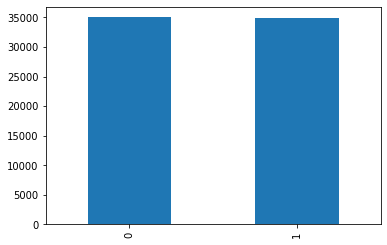

In [0]:
print(data['cardio'].value_counts())
data["cardio"].value_counts().plot(kind="bar")

## Data Examination

### Data Description
The first step to do examination on our data, after the previous steps done in the data introduction, is by seeing the data description.

By seeing description of the data, we can see the count, mean, standard deviation, minimum value, all of the quartile values, median, and maximum values of each of the column in the dataset. From these values, we can see the range of values we have in each column. And then, we can spot anomalies such as outliers that can lead us to spot bad labels or bad feature values that exists in each of the columns.

In [0]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From this description, we can see that there are columns that needs to be handled so we can have a better features quality.

1. For age column, As previously mentioned, the value is in days format, not in years format.
2. For height column, there is a possible outlier values (in max value) that needs to be handled after we inspect it more
3. For weight column, there is a possible outlier values (in max value) that needs to be handled after we inspect it more
4. For ap_hi column, there is a possible outlier values (in max and min value) that needs to be handled after we inspect it more
5. For ap_lo column, there is a possible outlier values (in max and min value) that needs to be handled after we inspect it more

## Data Cleaning and Transforming
After we do some examinations on our data, we can then clean and fix (by transforming/manipulating) our data so we can have a good dataset quality that can make our ML model have a better performance.

The data transformation that we will be doing in this section will only transform and encode the categorical features. For other transformations, we will do them on the other section

This section will handle the problematic feature that is spotted on the steps before

### Check and Remove Data Duplication

In [0]:
print("Number of duplicated values in dataset: {}".format(data.duplicated().sum()))

duplicated = data[data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

print('2 of duplicated data that exists in the dataset')
print(duplicated.head(2))

# Remove the duplicated data
data.drop_duplicates(inplace=True)
print("The duplicated data is successfully removed")
print("Number of duplicated values in dataset: {}".format(data.duplicated().sum()))

Number of duplicated values in dataset: 24
2 of duplicated data that exists in the dataset
         age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
id                                           ...                                   
3774   22077       1     175    69.0    120  ...     1      0     0       1       1
65352  22077       1     175    69.0    120  ...     1      0     0       1       1

[2 rows x 12 columns]
The duplicated data is successfully removed
Number of duplicated values in dataset: 0


It turns out that this dataset has data duplication so we remove them

### Handle age column
We will transform values from this column from Day to Year format

In [0]:
data["age"] = data["age"]/365
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


[]

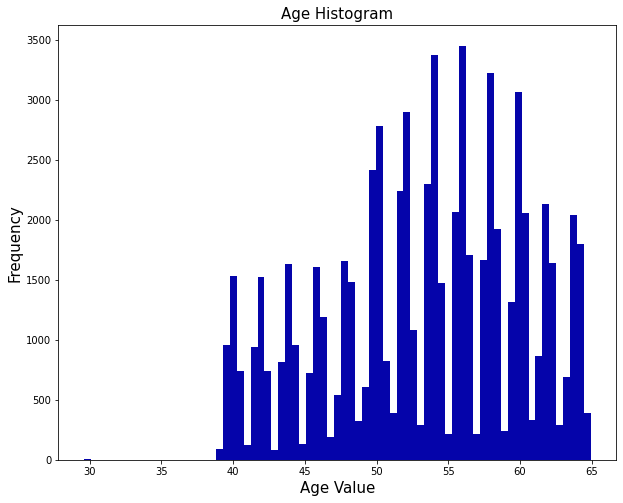

In [0]:
plt.figure(figsize=[10,8])
plt.hist(data['age'], bins='auto', color='#0504aa')
plt.xlabel('Age Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Age Histogram',fontsize=15)
plt.plot()

### Handle gender column
The values in the gender column have data type of categorical nominal between 2 values, which is male or female, symbolized by number 1 or 2. There is no explanation about what number 1 or 2 stand for so we will assume that:

*   1 is for Male
*   2 is for Female

This column needs to be transformed into a more representative numerical format which can be easily understood by our model to be trained.

The transformation that can be done to this column is by one-hot encoding.



In [0]:
data_gender = tf.one_hot(data['gender']-1, depth=2)
data['gender_male'] = data_gender[:,0]
data['gender_female'] = data_gender[:,1]
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,0.0,1.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,1.0,0.0
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,1.0,0.0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,0.0,1.0
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,1.0,0.0


In [0]:
data[5:1]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,bmi
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.990761,1,-1.629421,-0.500480,-0.413254,-0.153290,2,2,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.300709
9,1.071412,1,-0.897594,1.304807,0.172474,-0.153290,3,1,0,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.673154
12,1.262299,2,1.663802,1.443676,0.172474,0.853636,3,3,0,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.399207
13,-0.730057,1,-0.775623,-0.222744,-0.998981,-1.160216,1,1,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.145502
14,0.147779,1,-0.043795,-0.431046,-0.998981,-2.167142,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.373932
15,1.240414,1,0.566061,0.402163,-0.413254,-0.153290,1,1,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.074663


1    45509
2    24467
Name: gender, dtype: int64


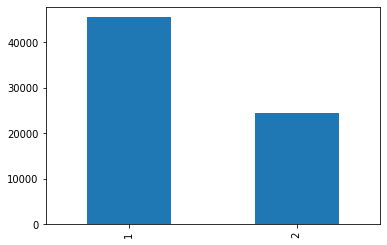

In [0]:
print(data['gender'].value_counts())
data["gender"].value_counts().plot(kind="bar")

### Handle Height column
Earlier, we spotted that there is a possibility of outliers in this column. We are going to examine it more in this section

In [0]:
# data = data.sort_values(["height"], ascending=False)
data.sort_values(["height"], ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
9223,58.136986,1,250,86.0,140,100,3,1,0,0,1,1,1.0,0.0
30894,52.202740,2,207,78.0,100,70,1,1,0,1,1,0,0.0,1.0
59847,52.567123,2,200,100.0,170,1100,2,2,0,0,1,1,0.0,1.0
94422,61.750685,1,198,80.0,140,90,1,2,0,0,1,1,1.0,0.0
71657,45.673973,1,198,75.0,170,100,2,1,0,1,1,1,1.0,0.0


[]

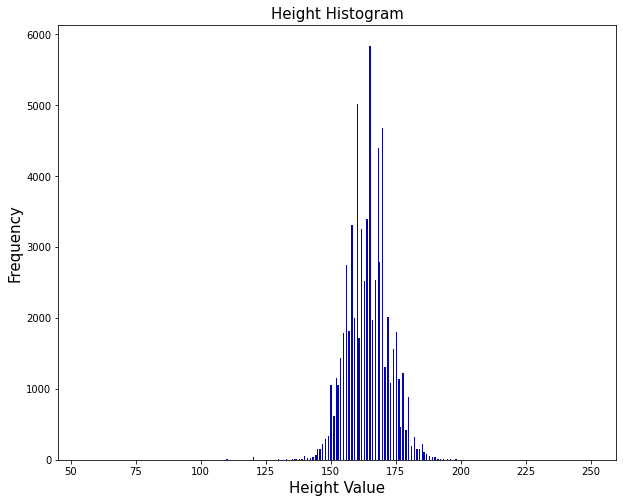

In [0]:
plt.figure(figsize=[10,8])
plt.hist(data['height'], bins='auto', color='#0504aa')
plt.xlabel('Height Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Height Histogram',fontsize=15)
plt.plot()

### Handle Weight Column

In [0]:
data.sort_values(["weight"], ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
618,45.931507,1,186,200.0,130,70,1,1,0,0,0,0,1.0,0.0
71945,41.416438,2,180,200.0,150,90,1,1,0,0,1,1,0.0,1.0
87498,57.367123,2,180,183.0,110,80,3,3,0,1,1,1,0.0,1.0
52564,53.780822,1,161,181.0,180,1100,2,1,0,0,1,1,1.0,0.0
87612,45.520548,2,196,180.0,130,80,3,1,0,0,1,1,0.0,1.0


[]

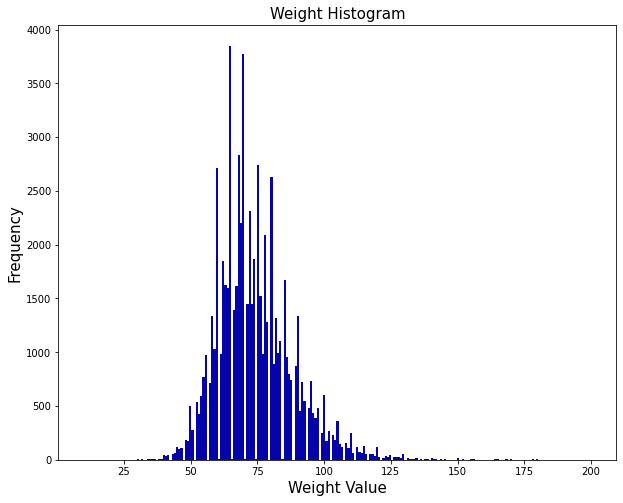

In [0]:
plt.figure(figsize=[10,8])
plt.hist(data['weight'], bins='auto', color='#0504aa')
plt.xlabel('Weight Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Weight Histogram',fontsize=15)
plt.plot()

### Handle ap_hi column
Based on data examination step, we can see that there are anomalies in their values. We will inpect it first

In [0]:
data.sort_values(["ap_hi"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
50055,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1,0.0,1.0
34295,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1,1.0,0.0
66571,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0,0.0,1.0
36025,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1,0.0,1.0
22881,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0,0.0,1.0
6525,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0,1.0,0.0
29313,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0,1.0,0.0
60477,51.276712,1,171,80.0,1,1088,1,1,0,0,1,1,1.0,0.0
12494,46.315068,2,163,63.0,1,2088,1,1,1,0,1,0,0.0,1.0


Based on this [source](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/blood_pressure_charts/basic_blood_pressure_chart.png), the ap_hi values is ranging from less than 120 until higher than 180. But, the possible ap_hi values that human have will be around 0-370 and that will be our assumptions for this task to set our boundaries.

We will handle the anomalies in this column's values by doing several considerations

In [0]:
hi_upper_bound = 370

#### Convert negative values

There are negative values for ap_hi, and based on our assumptions, there are human errors when the user input this data, where the value is supposed to be positive. So we will convert the negative values with the absolute values of it.

In [0]:
data['ap_hi'] = abs(data['ap_hi'])
data.sort_values(["ap_hi"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
12494,46.315068,2,163,63.0,1,2088,1,1,1,0,1,0,0.0,1.0
60477,51.276712,1,171,80.0,1,1088,1,1,0,0,1,1,1.0,0.0
7657,58.191781,1,162,69.0,7,80,1,1,0,0,1,0,1.0,0.0
89703,50.284932,1,155,79.0,10,70,1,1,0,0,1,0,1.0,0.0
82646,44.257534,1,165,56.0,10,60,1,1,0,0,1,0,1.0,0.0
29827,53.487671,1,155,55.0,10,60,1,1,0,0,0,0,1.0,0.0
3683,64.232877,1,170,64.0,10,70,1,1,0,0,1,1,1.0,0.0
41674,41.917808,1,155,52.0,10,70,1,1,0,0,1,0,1.0,0.0
94673,61.783562,1,169,88.0,10,160,3,3,0,0,0,1,1.0,0.0


#### Remove some rows that makes no sense
Other than that, there are still ap_hi values that does not make sense. For example, there are rows where ap_hi values are 1 and the ap_lo is extremely high, which is thousands. So we will remove those rows

In [0]:
# Remove rows with ap_hi values = 1

data = data[data.ap_hi != 1]
data.sort_values(["ap_hi"], ascending=True).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
7657,58.191781,1,162,69.0,7,80,1,1,0,0,1,0,1.0,0.0
81051,50.249315,1,160,80.0,10,80,1,1,0,0,1,1,1.0,0.0
94673,61.783562,1,169,88.0,10,160,3,3,0,0,0,1,1.0,0.0
89703,50.284932,1,155,79.0,10,70,1,1,0,0,1,0,1.0,0.0
29827,53.487671,1,155,55.0,10,60,1,1,0,0,0,0,1.0,0.0


#### Manipulate ap_hi values that are out of bound
there are ap_hi values that are higher than the upper boundary for ap_hi, which is 370. Based on our observations, those values, if divided by 10 or 100, still makes sense if it is partnered with ap_lo values, so we are going to divide them by 10 or 100 until the value is below 370

In [0]:
subset = data[data['ap_hi'] > hi_upper_bound]
subset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
2654,41.413699,1,160,60.0,902,60,1,1,0,0,1,0,1.0,0.0
2845,62.224658,2,167,59.0,906,0,1,1,0,0,1,0,0.0,1.0
6822,39.520548,1,168,63.0,909,60,2,1,0,0,1,0,1.0,0.0
11089,57.621918,1,175,80.0,11500,90,1,1,0,0,1,1,1.0,0.0
12710,51.698630,1,164,75.0,1420,80,2,1,0,0,1,1,1.0,0.0
13616,62.079452,1,155,87.0,701,110,1,1,0,0,1,1,1.0,0.0
19827,43.824658,1,168,72.0,1500,80,1,1,0,0,1,1,1.0,0.0
25314,61.364384,2,163,50.0,907,70,3,3,0,0,1,1,0.0,1.0
34120,44.194521,1,161,92.0,906,0,2,1,0,0,1,1,1.0,0.0


In [0]:
for index, row in data[data['ap_hi'] > hi_upper_bound].iterrows():
    while (data['ap_hi'].loc[index] > hi_upper_bound):
        data['ap_hi'].loc[index] = data['ap_hi'].loc[index]/10
data[data['ap_hi'] > hi_upper_bound]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,


### Handle ap_lo column
Based on data examination step, we can see that there are anomalies in their values. We will inpect it first

In [0]:
data.sort_values(["ap_lo"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
85816,61.838356,1,167,74.0,15.0,-70,1,1,0,0,1,1,1.0,0.0
65470,53.690411,2,165,70.0,140.0,0,3,1,1,0,1,0,0.0,1.0
39577,64.098630,2,180,73.0,140.0,0,1,1,1,1,1,1,0.0,1.0
60565,49.282192,2,176,69.0,90.6,0,1,1,0,0,1,0,0.0,1.0
36325,49.183562,2,176,73.0,12.0,0,1,1,0,0,1,0,0.0,1.0
45400,44.027397,1,170,64.0,90.7,0,1,1,0,0,1,0,1.0,0.0
75007,60.052055,1,155,66.0,13.0,0,1,1,0,0,1,0,1.0,0.0
32749,58.032877,2,166,68.0,149.0,0,1,1,0,0,1,1,0.0,1.0
91073,40.334247,2,161,61.0,117.0,0,1,1,0,0,1,0,0.0,1.0


Based on this [source](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/blood_pressure_charts/basic_blood_pressure_chart.png), the ap_lo values are ranging from less than 80 until higher than 120. But, the possible ap_hi values that human have will be around 0-360 and that will be our assumptions for this task to set our boundaries

In [0]:
lo_upper_bound = 360

#### Convert the negative values

In [0]:
data['ap_lo'] = abs(data['ap_lo'])
data.sort_values(["ap_lo"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
65470,53.690411,2,165,70.0,140.0,0,3,1,1,0,1,0,0.0,1.0
93224,64.690411,2,176,99.0,120.0,0,1,3,0,0,1,1,0.0,1.0
91073,40.334247,2,161,61.0,117.0,0,1,1,0,0,1,0,0.0,1.0
57646,55.676712,1,162,50.0,309.0,0,1,1,0,0,1,0,1.0,0.0
54780,63.583562,2,170,81.0,148.0,0,1,1,0,0,1,0,0.0,1.0
62754,51.512329,1,164,78.0,108.0,0,2,1,0,0,1,0,1.0,0.0
68612,52.087671,1,160,84.0,121.0,0,1,1,0,0,0,1,1.0,0.0
45400,44.027397,1,170,64.0,90.7,0,1,1,0,0,1,0,1.0,0.0
34120,44.194521,1,161,92.0,90.6,0,2,1,0,0,1,1,1.0,0.0


#### Manipulate ap_lo values that are out of bound
there are ap_lo values that are higher than the upper boundary for ap_lo, which is 360. Based on our observations, those values, if divided by 10 or 100, still makes sense if it is partnered with ap_hi values, so we are going to divide them by 10 or 100 until the value is below 360

In [0]:
subset_lo = data[data['ap_lo'] > lo_upper_bound]
subset_lo.sort_values(["ap_lo"], ascending=False).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
61901,63.619178,1,160,105.0,200.0,11000,1,1,0,0,1,1,1.0,0.0
97907,52.224658,1,166,70.0,160.0,10000,2,1,0,0,1,1,1.0,0.0
34098,49.594521,2,169,86.0,150.0,10000,2,2,0,1,1,1,0.0,1.0
3352,57.517808,2,186,105.0,140.0,10000,1,1,0,0,1,1,0.0,1.0
62058,60.016438,2,179,62.0,130.0,9800,1,1,0,0,1,0,0.0,1.0
9482,53.501370,1,162,69.0,130.0,9100,1,1,0,0,1,1,1.0,0.0
17260,58.810959,2,169,78.0,130.0,9011,1,1,1,1,1,1,0.0,1.0
47030,50.232877,1,156,65.0,150.0,9011,2,2,0,0,1,1,1.0,0.0
22832,39.747945,2,179,70.0,120.0,8500,1,1,0,0,1,0,0.0,1.0


In [0]:
for index, row in data[data['ap_lo'] > lo_upper_bound].iterrows():
    while (data['ap_lo'].loc[index] > lo_upper_bound):
        data['ap_lo'].loc[index] = data['ap_lo'].loc[index]/10
data[data['ap_lo'] > lo_upper_bound]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,


#### Remove rows where ap_lo is higher than ap_hi

Because it is impossible to have ap_lo that is higher than ap_hi

In [0]:
data.drop(data[data["ap_lo"] > data["ap_hi"]].index, inplace=True)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female
id,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,0.0,1.0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,1.0,0.0
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,1.0,0.0
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,0.0,1.0
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,2,168,76.0,120.0,80.0,1,1,1,0,1,0,0.0,1.0
99995,61.920548,1,158,126.0,140.0,90.0,2,2,0,0,1,1,1.0,0.0
99996,52.235616,2,183,105.0,180.0,90.0,3,1,0,1,0,1,0.0,1.0


### Handle cholesterol column

In [0]:
data_chol = tf.one_hot(data['cholesterol']-1, depth=3)
data['cholesterol_1'] = data_chol[:,0]
data['cholesterol_2'] = data_chol[:,1]
data['cholesterol_3'] = data_chol[:,2]
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,0.0,1.0,1.0,0.0,0.0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,1.0,0.0,0.0,0.0,1.0
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,0.0,1.0,1.0,0.0,0.0
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0


1    52137
2     9514
3     8042
Name: cholesterol, dtype: int64


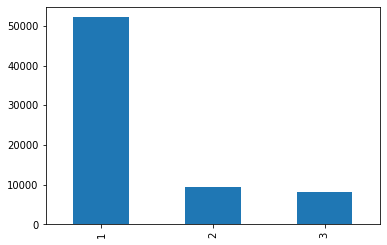

In [0]:
print(data['cholesterol'].value_counts())
data["cholesterol"].value_counts().plot(kind="bar")

### Handle glucose column

In [0]:
data_gluc = tf.one_hot(data['gluc']-1, depth=3)
data['gluc_1'] = data_gluc[:,0]
data['gluc_2'] = data_gluc[:,1]
data['gluc_3'] = data_gluc[:,2]
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


1    59222
3     5300
2     5171
Name: gluc, dtype: int64


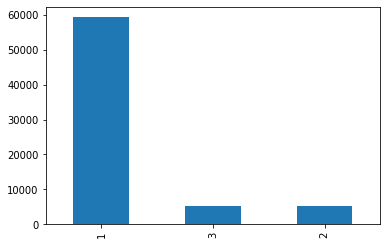

In [0]:
print(data['gluc'].value_counts())
data["gluc"].value_counts().plot(kind="bar")

### Handle smoking column

In [0]:
data_smoke = tf.one_hot(data['smoke'], depth=2)
data['smoke_0'] = data_smoke[:,0]
data['smoke_1'] = data_smoke[:,1]
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1
id,,,,,,,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


0    63546
1     6147
Name: smoke, dtype: int64


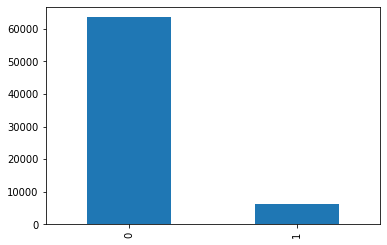

In [0]:
print(data['smoke'].value_counts())
data["smoke"].value_counts().plot(kind="bar")

### Handle alcohol intake column

In [0]:
data_alco = tf.one_hot(data['alco'], depth=2)
data['alco_0'] = data_alco[:,0]
data['alco_1'] = data_alco[:,1]
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1
id,,,,,,,,,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


0    65961
1     3732
Name: alco, dtype: int64


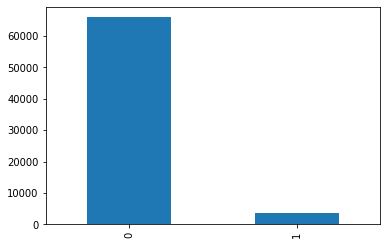

In [0]:
print(data['alco'].value_counts())
data["alco"].value_counts().plot(kind="bar")

### Handle physical activity column

In [0]:
data_active = tf.one_hot(data['active'], depth=2)
data['active_0'] = data_active[:,0]
data['active_1'] = data_active[:,1]
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male,gender_female,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


1    56020
0    13673
Name: active, dtype: int64


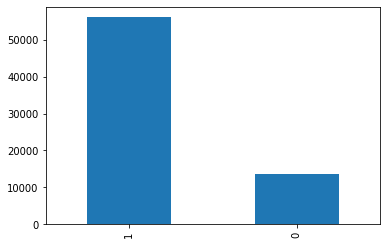

In [0]:
print(data['active'].value_counts())
data["active"].value_counts().plot(kind="bar")

### BMI: Add new feature
We are not really sure about people that has more weight in Kg than height in Cm. So we are going to add one more feature, BMI and we have to look to this [source](https://www.webmd.com/diet/news/20070409/morbid-obesity-bulge-gets-bigger) and filter this data based on that source. Notice that BMI has fix unit kg/m2, so we convert the height unit first and we choose Max value of BMI is 70 because it says extreme obese people has 50 or more. We assume that more than 70 BMI has an invalid values. And base on this [source](https://www.ennonline.net/fex/15/limits), it says fatal value 13 for male and 11 for female, so we choose minimum value of 12.

In [0]:
data["height"] = data["height"]/100 # Convert the height unit

data['bmi'] = data["weight"]/data["height"]**2
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [0]:
data[['age','height','weight','ap_hi','ap_lo','bmi']].head()

,age,height,weight,ap_hi,ap_lo,bmi
id,,,,,,
0,18393,1.68,62.0,110,80,21.967120
1,20228,1.56,85.0,140,90,34.927679
2,18857,1.65,64.0,130,70,23.507805
3,17623,1.69,82.0,150,100,28.710479
4,17474,1.56,56.0,100,60,23.011177


### Normalize Data
To make training process more feasible, we normalize the data so the value of the features doesn't really have a significant difference.

In [0]:
data_mean = data.mean()
data_std = data.std()
data_norm = data
data_norm['age'] = (data['age'] - data_mean['age'])/data_std['age']
data_norm['height'] = (data['height'] - data_mean['height'])/data_std['height']
data_norm['weight'] = (data['weight'] - data_mean['weight'])/data_std['weight']
data_norm['ap_hi'] = (data['ap_hi'] - data_mean['ap_hi'])/data_std['ap_hi']
data_norm['ap_lo'] = (data['ap_lo'] - data_mean['ap_lo'])/data_std['ap_lo']
data_norm['bmi'] = (data['bmi'] - data_mean['bmi'])/data_std['bmi']
# data_norm.head()
data_norm[['age','height','weight','ap_hi','ap_lo','bmi']].head()

,age,height,weight,ap_hi,ap_lo,bmi
id,,,,,,
0,-0.436058,0.443449,-0.847867,-0.122181,-0.088238,-0.917571
1,0.307684,-1.018161,0.749826,0.072610,-0.035180,1.210072
2,-0.247995,0.078046,-0.708937,0.007679,-0.141296,-0.664647
3,-0.748147,0.565250,0.541431,0.137540,0.017878,0.189439
4,-0.808538,-1.018161,-1.264657,-0.187111,-0.194354,-0.746175


## Data Exploration

### Heatmap

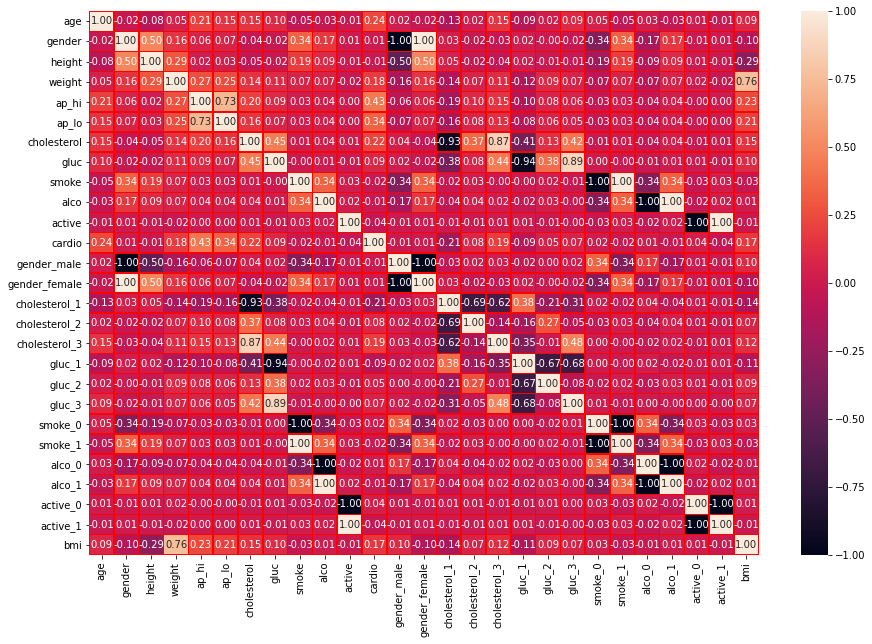

In [0]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_norm.corr(),annot=True,linewidth=0.5,linecolor='red', fmt = '.2f',ax=ax)
plt.show()

There are some features that has more than 0.2 correlation value to the label(cardio), which is age, ap_hi, and ap_lo. And notice, at first height value doesn't really have a connection to the result but when we create BMI column, height value have a connection through BMI value.